# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 7/15/22
* Student Name: Sara Koochagian
* Student Net ID: sk2hh
* This URL: https://github.com/skoochagian/FINALPROJECT/blob/main/FinalProjectSubmissionTemplate.ipynb
* GitHub Repo URL: https://github.com/skoochagian/FINALPROJECT

# The Monte Carlo Module

In [19]:
import numpy as np
import pandas as pd
import random

#Die Class
class Die():
    '''
    Purpose: the purpose of this class is to create a dice by defining face values and their respective weights.
    '''
    def __init__(self,face_list):
        """ 
        Purpose: The initializing of default parameters and inputs for the class.
        
        Input
        --------
        face_list: A list of the dice faces for creating the dice. The values in the list can be strings or integers.
    
        Default parameters
        ----------------------
        Weight: A default list of weights where the weight is 1.0 for all values in face_list.
        df: A private dataframe that will hold all the faces and weights of the dice.

        """
        self.face = face_list
        weight = [1.0 for x in range(0,len(face_list))]
        self._df = pd.DataFrame(
            {'Weight': weight}, index = self.face)
        self._df.index.name = 'Face'

    def change_weights(self,face_value,weight_value):
        """
        Purpose: To change the weight of a particular face in the face_list

        Input
        --------
        face_value: the face value that will have a new weight assigned in weight
        weight_value: the new weight of the face. This value must be a numerical value, either float or integer
        
        Output
        ---------
        There is no output.
        """
        if face_value not in self.face:
            print('Face not on dice, try again.')
        elif type(weight_value) == str:
            print('Weight needs to be a numerical value') 
        elif type(weight_value)== int:
            float(weight_value)
        self._df.loc[face_value] = weight_value
        
    def dice_roll(self,rolls):
        """
        Purpose: This function rolls the dice and produces the results by adding them to a list
        
        Input
        --------
        rolls: the number of times the dice will be rolled
        
        Output
        --------- 
        result: A list of the results that were rolled
        """
        self.result = random.choices(self._df.index, weights = self._df['Weight'], k = rolls)
        return self.result

    def show_dice(self):
        """
        Purpose: This function shows the dataframe of the faces and the weights

        Input
        -------
        None
        
        Output 
        --------
        df: The dataframe with the face values as the index and the weights as the column
        """
        return self._df

#Game Class
class Game():
    '''
    Purpose: The purpose of this class is to produce a game of rolling one or more dice.
    '''
    def __init__(self, die_list):
        """
        Purpose: Initializes the list of dice.

        Input
        -------
        die_list: A list of die,where the values are using the Die class. There must be a minimum of one die in the list in order to be used.

        Output
        --------
        There is no output.
        """
        self.die_list = die_list
        return None
    
    def play_game(self,rolls):
        """
        Purpose: This function plays a game where a dice is rolled. Each dice that is in the list is rolled a certain number of times. 
        The results are put into a private dataframe.

        Input
        -------
        rolls: The number of time each dice will be rolled. The value must be an integer, and at least one.
        
        Output 
        ---------
        _gamedf: A private dataframe. The roll numbers are the index of the dataframe and the dice numbers are the columns. 
        The columns have the resulting face values from the game as the elements in the columns.
        
        """
        self.rolls = rolls
        self._gamedf = pd.DataFrame() #will make this private later 'self._df
        for i in range(len(self.die_list)):
            x = pd.DataFrame({str(i+1) :self.die_list[i].dice_roll(rolls)}, index = range(1,rolls+1)) #Dice roll should be a number not a list
            x.index.name = 'Roll'
            self._gamedf = pd.concat([self._gamedf, x],axis = 1) #this is being problematic, need to get this into the dataframe
        return self._gamedf
    
    def show_results(self, type = 'Wide'):
        """
        Purpose: This function provides an option to style the previous dataframe in a certain style. 

        Input
        -------
        type: A string of how the dataframe will be formatted. The two options are 'Wide' or 'Narrow'. 
            - The wide format is the default format that the dataframe is normally formatted in.
            - The narrow format will format the dataframe with the roll number and dice number as the two indicies, with the one 
              column being the faces.
        
        Output 
        -------
        _gamedf: The result is the dataframe in the format that was put into the function.
        """
        self.rolls = self.rolls
        if type == 'Wide': 
            return self._gamedf
        elif type == 'Narrow':
            self._gamedf = pd.DataFrame(self._gamedf.stack())
            self._gamedf.columns = {'Face'}
            return self._gamedf
        else:
            print('Incorrect format type.')
#Analyzer class
class Analyzer():
    """
    Purpose: Analyzing the results of the Game class.
    """
    def __init__(self,game):
      """
      Purpose: Initializing the input of the class function.

      Input
      -------
      game: A game using the Game function. 
      """
      self.game = game
     
    def jackpot(self):
      """ 
      Purpose: This function shows how many times the dice produced the same face on the same roll 
      
      Input 
      --------
      There is no input

      Output
      ---------
      total: The number of times the dice produce the same face on the same roll.

      """
      self.rolls = self.game.rolls
      self.game._gamedf = self.game._gamedf
      self.total = 0
      x = pd.DataFrame({'Jackpot':self.game._gamedf.nunique(axis = 1)}, index = range(1,self.game.rolls))
      x.index.name = 'Roll'
      for i in x['Jackpot']:
        if i == 1:
          self.total += 1
      return self.total

    def combo(self):
        """
        Purpose: Calculates the number of times a combination of results appears through the game.

        Input 
        --------
        There is no input.

        Output 
        ---------
        There is no output.        
        """
        self.result = self.game.show_results()
        self.combodf = self.result.apply(lambda x: pd.Series(sorted(x)), 1).value_counts().to_frame('n')

    def show_face_count(self):
        """
        Purpose: Stores the count of face combinations rolled into a dataframe.

        Input 
        --------
        There is no input.

        Output
        --------
        There is no output.
        """
        self.result = self.game.show_results('Wide')
        self.facecountdf = self.result.apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)

# Test Module

In [ ]:
from montecarlopackage.montecarlo import Die
from montecarlopackage.montecarlo import Game
from montecarlopackage.montecarlo import Analyzer
import unittest
import pandas as pd

class DieTestSuite(unittest.TestCase):
    
    def test_weight_change(self):
        dice = [1,2,3,4,5,6]
        dicetest = Die(dice)
        dicetest.change_weights(4,3.0)
        testValue = 3.0
        message = 'Weight was not changed'
        self.assertTrue(testValue,message)
    def test_dice_roll(self):
        dice = [1,2,3,4,5,6]
        dicetest = Die(dice)
        dicetest.dice_roll(5)
        testValue = len(dicetest.result)
        actual = 5
        self.assertEqual(testValue,actual)
    def test_show_dice(self):
        dice = [1,2,3,4,5,6]
        dicetest = Die(dice)
        dicetest.dice_roll(5)
        testValue = len(dicetest._df.columns)
        expected = 1
        self.assertEqual(testValue,expected)
class GameTestSuite(unittest.TestCase):
    def test_play_game(self):
        dice = Die([1,2,3,4,5,6])
        dice2 = Die([2,4,6,8,10])
        thelist = [dice, dice2]
        dicetest = Game(thelist)
        dicetest.play_game(5)
        testValue = len(dicetest._gamedf.index)
        expected = 5
        self.assertEqual(testValue,expected)
    def test_show(self):
        dice = Die([1,2,3,4,5,6])
        dice2 = Die([2,4,6,8,10,12])
        thelist = [dice, dice2]
        dicetest = Game(thelist)
        dicetest.play_game(5)
        dicetest.show_results('Narrow')
        testValue = len(dicetest._gamedf.columns)
        expected = 1
        self.assertEqual(testValue,expected)
class AnalyzerTestSuite(unittest.TestCase):
    def test_jackpot(self):
        dice = Die([1,2,3,4,5,6])
        dice2 = Die([1,2,3,4,5,6])
        thelist = [dice, dice2]
        dicetest = Game(thelist)
        dicetest.play_game(300)
        analyze = Analyzer(dicetest)
        analyze.jackpot()
        testValue = analyze.total >= 1
        message = 'Try again'
        self.assertTrue(testValue,message)
    def test_combo(self):
        dice = Die([1,2,3,4,5,6])
        dice2 = Die([1,2,3,4,5,6])
        thelist = [dice, dice2]
        dicetest = Game(thelist)
        dicetest.play_game(300)
        analyze = Analyzer(dicetest)
        analyze.combo()
        testValue = sum(analyze.combodf['n'])
        expected = 300
        self.assertEqual(testValue,expected)
    def test_show_face_count(self):
        dice = Die([1,2,3,4,5,6])
        dice2 = Die([1,2,3,4,5,6])
        thelist = [dice, dice2]
        dicetest = Game(thelist)
        dicetest.play_game(300)
        analyze = Analyzer(dicetest)
        analyze.show_face_count()
        testValue = len(analyze.facecountdf.index)
        expected = 300
        self.assertEqual(testValue,expected)

if __name__ == '__main__':
    unittest.main(verbosity=3)

# Test Results

In [ ]:
python : test_combo (__main__.AnalyzerTestSuite) ... ok
At line:1 char:1
+ python montecarlo_test.py 2> montecarlo_test_result.txt
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : NotSpecified: (test_combo (__m...stSuite) ... ok:String) [], RemoteException
    + FullyQualifiedErrorId : NativeCommandError
 
test_jackpot (__main__.AnalyzerTestSuite) ... ok
test_show_face_count (__main__.AnalyzerTestSuite) ... ok
test_dice_roll (__main__.DieTestSuite) ... ok
test_show_dice (__main__.DieTestSuite) ... ok
test_weight_change (__main__.DieTestSuite) ... ok
test_play_game (__main__.GameTestSuite) ... ok
test_show (__main__.GameTestSuite) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.265s

OK


# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [1]:
import montecarlopackage
from montecarlopackage.montecarlo import Die
from montecarlopackage.montecarlo import Game
from montecarlopackage.montecarlo import Analyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Welcome to the Monte Carlo Simulator


In [2]:
x = ['H','T']
y = ['H','T']
fair = Die(x)
unfair = Die(y) #weight changed coin
unfair.change_weights('H',5.0)
list = [fair, fair,fair]
game1 = Game(list)
game1.play_game(1000)

,1,2,3
Roll,,,
1,T,H,H
2,T,T,T
3,H,H,H
4,T,T,T
5,T,H,T
...,...,...,...
996,T,T,H
997,H,T,H
998,T,H,H


In [3]:
analyzer1 = Analyzer(game1)
analyzer1.jackpot()
total_frequency1 = analyzer1.jackpot() / analyzer1.rolls
total_frequency1

0.244

In [4]:
list2 = [unfair, unfair, fair]
game2 = Game(list2)
game2.play_game(1000)

,1,2,3
Roll,,,
1,T,H,H
2,H,H,H
3,T,H,H
4,H,H,T
5,H,H,H
...,...,...,...
996,H,H,H
997,H,H,T
998,T,H,H


In [5]:
analyzer2 = Analyzer(game2)
analyzer2.jackpot()
total_frequency2 = analyzer2.jackpot() / analyzer2.rolls
total_frequency2

0.358

Text(0.5, 1.0, 'Relative Frequencies of Coin Flip Scenarios')

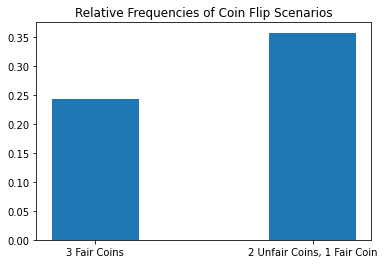

In [6]:
list1 = ['3 Fair Coins','2 Unfair Coins, 1 Fair Coin']
list2 = [total_frequency1,total_frequency2]
plt.bar(list1,list2,width = 0.4)
plt.title('Relative Frequencies of Coin Flip Scenarios')

## Scenario 2

In [7]:
a = [1,2,3,4,5,6]
b = [1,2,3,4,5,6]
c = [1,2,3,4,5,6]
fairdice = Die(a)
unfairdie1 = Die(b)
unfairdie2 = Die(c)
unfairdie1.change_weights(6,5.0)
unfairdie2.change_weights(1,5.0)
list1 = [fairdice, fairdice,fairdice,fairdice,fairdice]
scenario21 = Game(list1)
scenario21.play_game(10000)

,1,2,3,4,5
Roll,,,,,
1,3,1,4,3,3
2,1,1,6,3,2
3,1,3,1,2,1
4,5,4,4,4,4
5,4,6,6,1,3
...,...,...,...,...,...
9996,2,5,4,2,2
9997,2,5,1,4,3
9998,3,4,4,4,5


In [8]:
scen2analyze1 = Analyzer(scenario21)
scen2analyze1.jackpot()
scen2_frequ1 = scen2analyze1.jackpot() / scen2analyze1.rolls
scen2_frequ1

0.0013

In [9]:
list3 = [unfairdie1, unfairdie1, unfairdie2, fairdice, fairdice]
scenario22 = Game(list3)
scenario22.play_game(10000)

,1,2,3,4,5
Roll,,,,,
1,6,1,4,1,6
2,2,6,4,3,1
3,1,2,1,5,6
4,3,5,1,5,1
5,3,6,5,4,2
...,...,...,...,...,...
9996,6,5,1,5,3
9997,6,6,2,6,4
9998,6,5,1,6,2


In [10]:
scen2analyze2 = Analyzer(scenario22)
scen2analyze2.jackpot()
scen2_frequ2 = scen2analyze2.jackpot() / scen2analyze2.rolls
scen2_frequ2

0.0012

Text(0.5, 1.0, 'Relative Frequencies of Dice Rolls')

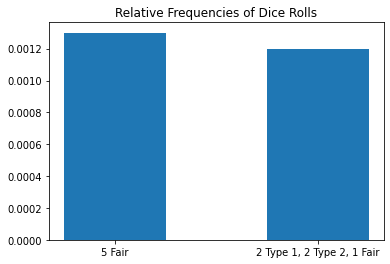

In [11]:
dicetype = ['5 Fair', '2 Type 1, 2 Type 2, 1 Fair']
freq = [scen2_frequ1,scen2_frequ2]
plt.bar(dicetype,freq,width = 0.5)
plt.title('Relative Frequencies of Dice Rolls')

<BarContainer object of 10 artists>

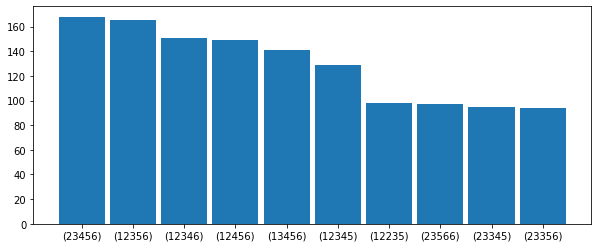

In [12]:
scen2analyze1.combo()
topcombovalues = scen2analyze1.combodf.index[0:10]
topcombo1 = [i for i in scen2analyze1.combodf['n'][0:10]]
key = pd.DataFrame(topcombovalues)
keys1 = []
for x in range(10):
    keys1.append((str(key[0][x])).replace(', ',''))
plt.figure(figsize=[10,4])
plt.bar(keys1,topcombo1, width = 0.9)

<BarContainer object of 10 artists>

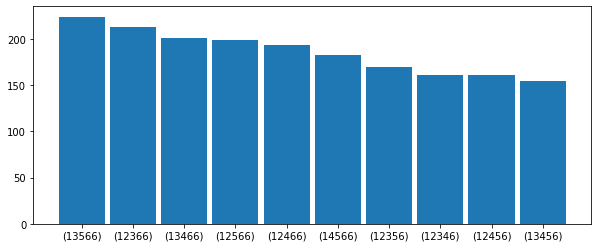

In [13]:
scen2analyze2.combo()
topcombovalues2 = scen2analyze2.combodf.index[0:10]
topcombo2 = [i for i in scen2analyze2.combodf['n'][0:10]]
key2 = pd.DataFrame(topcombovalues2)
keys2 = []
for x in range(10):
    keys2.append((str(key2[0][x])).replace(', ',''))
plt.figure(figsize=[10,4])
plt.bar(keys2,topcombo2, width = 0.9)

## Scenario 3

In [14]:
letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
letter_die = Die(letter)
letter_die.change_weights('a', 8.4966)
letter_die.change_weights('b', 2.0720)
letter_die.change_weights('c', 4.5388)
letter_die.change_weights('d', 3.3844)
letter_die.change_weights('e', 11.1607)
letter_die.change_weights('f', 1.8121)
letter_die.change_weights('g', 2.4705)
letter_die.change_weights('h', 3.0034)
letter_die.change_weights('i', 7.5448)
letter_die.change_weights('j', 0.1965)
letter_die.change_weights('k', 1.1016)
letter_die.change_weights('l', 5.4893)
letter_die.change_weights('m', 3.0129)
letter_die.change_weights('n', 6.6544)
letter_die.change_weights('o', 7.1635)
letter_die.change_weights('p', 3.1671)
letter_die.change_weights('q', 0.1962)
letter_die.change_weights('r', 7.5809)
letter_die.change_weights('s', 5.7351)
letter_die.change_weights('t', 6.9509)
letter_die.change_weights('u', 3.6308)
letter_die.change_weights('v', 1.0074)
letter_die.change_weights('w', 1.2899)
letter_die.change_weights('x', 0.2902)
letter_die.change_weights('y', 1.7779)
letter_die.change_weights('z', 0.2722)

letterlist = [letter_die,letter_die,letter_die,letter_die,letter_die]
lettergame = Game(letterlist)
lettergame.play_game(1000)

,1,2,3,4,5
Roll,,,,,
1,r,n,b,e,o
2,s,h,d,c,l
3,u,i,a,e,p
4,t,o,o,w,i
5,o,a,l,r,d
...,...,...,...,...,...
996,n,r,o,h,l
997,h,l,t,h,d
998,o,o,y,g,t


In [15]:
letteranalyze = Analyzer(lettergame)
letteranalyze.combo()
letterkey = pd.DataFrame(letteranalyze.combodf.index)
keys3 = []
for x in range(len(letterkey)):
    keys3.append((str(letterkey[0][x])).replace('\', \'','')[2:7])

In [16]:
url = 'https://www-cs-faculty.stanford.edu/~knuth/sgb-words.txt'
scrabble = pd.read_csv(url, header = None)
scrabbledf = pd.DataFrame(scrabble)
words = []
for word in keys3:
    if word in scrabbledf.values:
        words.append(word)

In [17]:
words

['deity', 'dotty', 'ginny', 'abbot']

In [18]:
word_freq = len(words) / 1000
word_freq

0.004

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [21]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 72B4-2DB2

 Directory of c:\Users\snkoo\FINALPROJECT\FINALPROJECT

07/15/2022  09:16 PM    <DIR>          .
07/15/2022  07:22 PM    <DIR>          ..
07/15/2022  09:13 PM                64 directory.py
07/15/2022  09:31 PM            82,980 FinalProjectSubmissionTemplate.ipynb
07/15/2022  07:21 PM             1,089 LICENSE
07/15/2022  09:18 PM    <DIR>          montecarlopackage
07/15/2022  09:16 PM    <DIR>          montecarlopackage.egg-info
07/15/2022  09:18 PM            72,290 montecarlo_demo.ipynb
07/15/2022  09:19 PM             2,923 montecarlo_test.py
07/14/2022  10:03 AM             1,604 montecarlo_test_result.txt
07/15/2022  09:22 PM            11,951 README.md
07/15/2022  09:15 PM               437 setup.py
07/15/2022  08:44 PM    <DIR>          __pycache__
               8 File(s)        173,338 bytes
               5 Dir(s)  254,771,589,120 bytes free


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [22]:
!pip install -e .

Obtaining file:///C:/Users/snkoo/FINALPROJECT/FINALPROJECT
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: montecarlopackage
    Found existing installation: montecarlopackage 0.1.0
    Uninstalling montecarlopackage-0.1.0:
      Successfully uninstalled montecarlopackage-0.1.0
  Running setup.py develop for montecarlopackage
